# Energy Data Analysis
> 潘漪滢, 3210104136\
> 《统计与大数据分析》, 2023

- 之前修读过计量经济学，所以在多元回归的部分结合了一下另一门课程的知识，但回归模型的拟合效果并没有很好。
- 数据缺失的问题实在太严重了，不知道该怎么调整，插值也不太适合，所以缺失值采用了删去整行记录。

写完以后的反思：
- 整体结构有一点乱，开始并没有定下明确的主线主题，是后期归纳的。
- 后续可以考虑做更多的探索，比如能源趋势与结构探究的模块，可以多一些纵向的国家之间的对比，进一步考量发展水平/地理文化因素与能源结构的关系（纳入化石燃料等更多的细化分类）。

# 引言
研究能源消耗情况的动机源于对全球能源格局和未来发展趋势的渴望，通过深入了解不同国家和地区的能源使用情况，**揭示能源与经济发展水平之间的相互关系，预测未来的能源需求与结构**，为可持续发展提供更深刻的洞察力。能源是推动社会进步和经济增长的关键因素，因此对其合理利用和未来需求的准确预测至关重要。

围绕以下主线：
1. 能源与经济：全球国家能源消耗与经济发展水平关系分析\
动机： 通过深入研究各国家/地区的能源消耗情况，揭示其与经济发展水平之间的关系，探讨经济增长如何影响能源需求，并为可持续发展提供启示。
2. 未来能源趋势：能源需求与结构预测（主要为我国）\
动机： 基于历史数据，利用统计分析方法预测未来全球能源需求的趋势与结构，为能源规划和可持续发展提供指导。

本项目包括如下内容：
- 0 数据导入
- 1 初步分析与数据的可视化呈现
- 2 参数估计和区间估计
- 3 假设检验
- 4 回归分析
- 5 机器学习
- 6 总结\
具体内容在后续以小节标题进一步呈现。

# 0 数据导入

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
file_path = r"D:\统计与大数据分析\期末大作业\owid-energy-data.csv"  
if not os.path.exists(file_path):
    file_path = "owid-energy-data.csv"
df = pd.read_csv(file_path, encoding='utf-8')


# 1 初步分析及数据的可视化呈现
- **探索性数据分析**：使用图表（如箱型图、堆叠图、散点图等）来展示国家、年份、人口、GDP、不同能源消耗（如生物燃料、煤炭、天然气、风能等）之间的关系。
- **时间序列分析**：展示关键指标（如人均GDP、人均总发电量等）随时间的变化趋势。

## 1.1 描述统计
1. 由于原始数据集涉及国家众多，在部分分析中，仅考虑以下**代表性国家**（此处给出分类型定义）：
- 北美洲
    - 美国：作为世界最大的经济体之一，美国在全球政治、经济和文化方面有着显著影响。
    - 加拿大：北美洲的主要国家，经济发达，资源丰富。
- 欧洲
    - 英国：具有重要的国际金融影响力和历史文化遗产。
- 亚洲
    - 中国：世界第二大经济体，人口最多的国家，经济和文化影响力显著。
    - 印度：人口众多，经济快速增长，文化多样性丰富。
- 非洲
    - 尼日利亚：非洲人口最多的国家，经济潜力巨大。
    - 南非：非洲最南端的国家，经济相对发达。
- 拉丁美洲
    - 巴西：南美洲最大的国家，经济和文化影响力显著。
- 大洋洲
    - 澳大利亚：经济发达，政治稳定，文化多样。
 2. 考虑到数据完整性和时效性，仅对2000年到2018年的数据进行分析。（其余年份数据缺失较为严重）
 
 对上述数据进行描述统计，呈现平均数、标准差、4分位数、最大值、最小值等。

In [3]:
# 选取几个国家进行展示
selected_countries = ['United States','Canada','United Kingdom','China','India','Nigeria','South Africa','Brazil','Australia']
filtered_data_country = df[(df['country'].isin(selected_countries)) & (df['year'] >= 2000) & (df['year'] <= 2018)]
# 进行描述统计
description_country = filtered_data_country.describe()
# 打印描述统计结果
print(description_country)



              year    population           gdp  biofuel_cons_change_pct  \
count   171.000000  1.710000e+02  1.710000e+02               134.000000   
mean   2009.000000  3.767516e+08  4.544851e+12                34.021582   
std       5.493311  4.944086e+08  5.365777e+12               127.548575   
min    2000.000000  1.901797e+07  2.681331e+11               -91.179000   
25%    2004.000000  4.878661e+07  9.795026e+11                -1.774250   
50%    2009.000000  1.565957e+08  2.100503e+12                 8.725000   
75%    2014.000000  3.207046e+08  6.136499e+12                25.492250   
max    2018.000000  1.417069e+09  1.815162e+13               984.007000   

       biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
count               148.000000               150.000000           150.000000   
mean                  4.188527               250.352400            53.289307   
std                  10.851680               352.747516            97.030713   
min 

## 1.2 面板数据：代表性国家人均GDP与人均总发电量随年份变化的折线图
变量的简要说明：
1. **人口（Population）：**
   - 定义：按国家/地区划分的总人口。
   - 单位：个。

2. **国内生产总值（GDP）：**
   - 定义：以国际美元衡量的国内生产总值。使用2011年的价格来调整价格随时间的变化（通货膨胀）和国家之间的价格差异。
   - 单位：美元。

3. **人均GDP（Per Capita GDP）：**
   - 定义：国内生产总值除以人口得到的平均每人产值。
   - 计算方式：$\text{Per Capita GDP} = \frac{\text{GDP}}{\text{Population}} $
   - 单位：美元每人。

4. **人均总发电量（Per Capita Electricity）：**
   - 定义：每人消耗的电力总量。
   - 计算方式：$\text{Per Capita Electricity} = \frac{\text{Total Electricity Generation}}{\text{Population}} $
   - 单位：千瓦时每人。

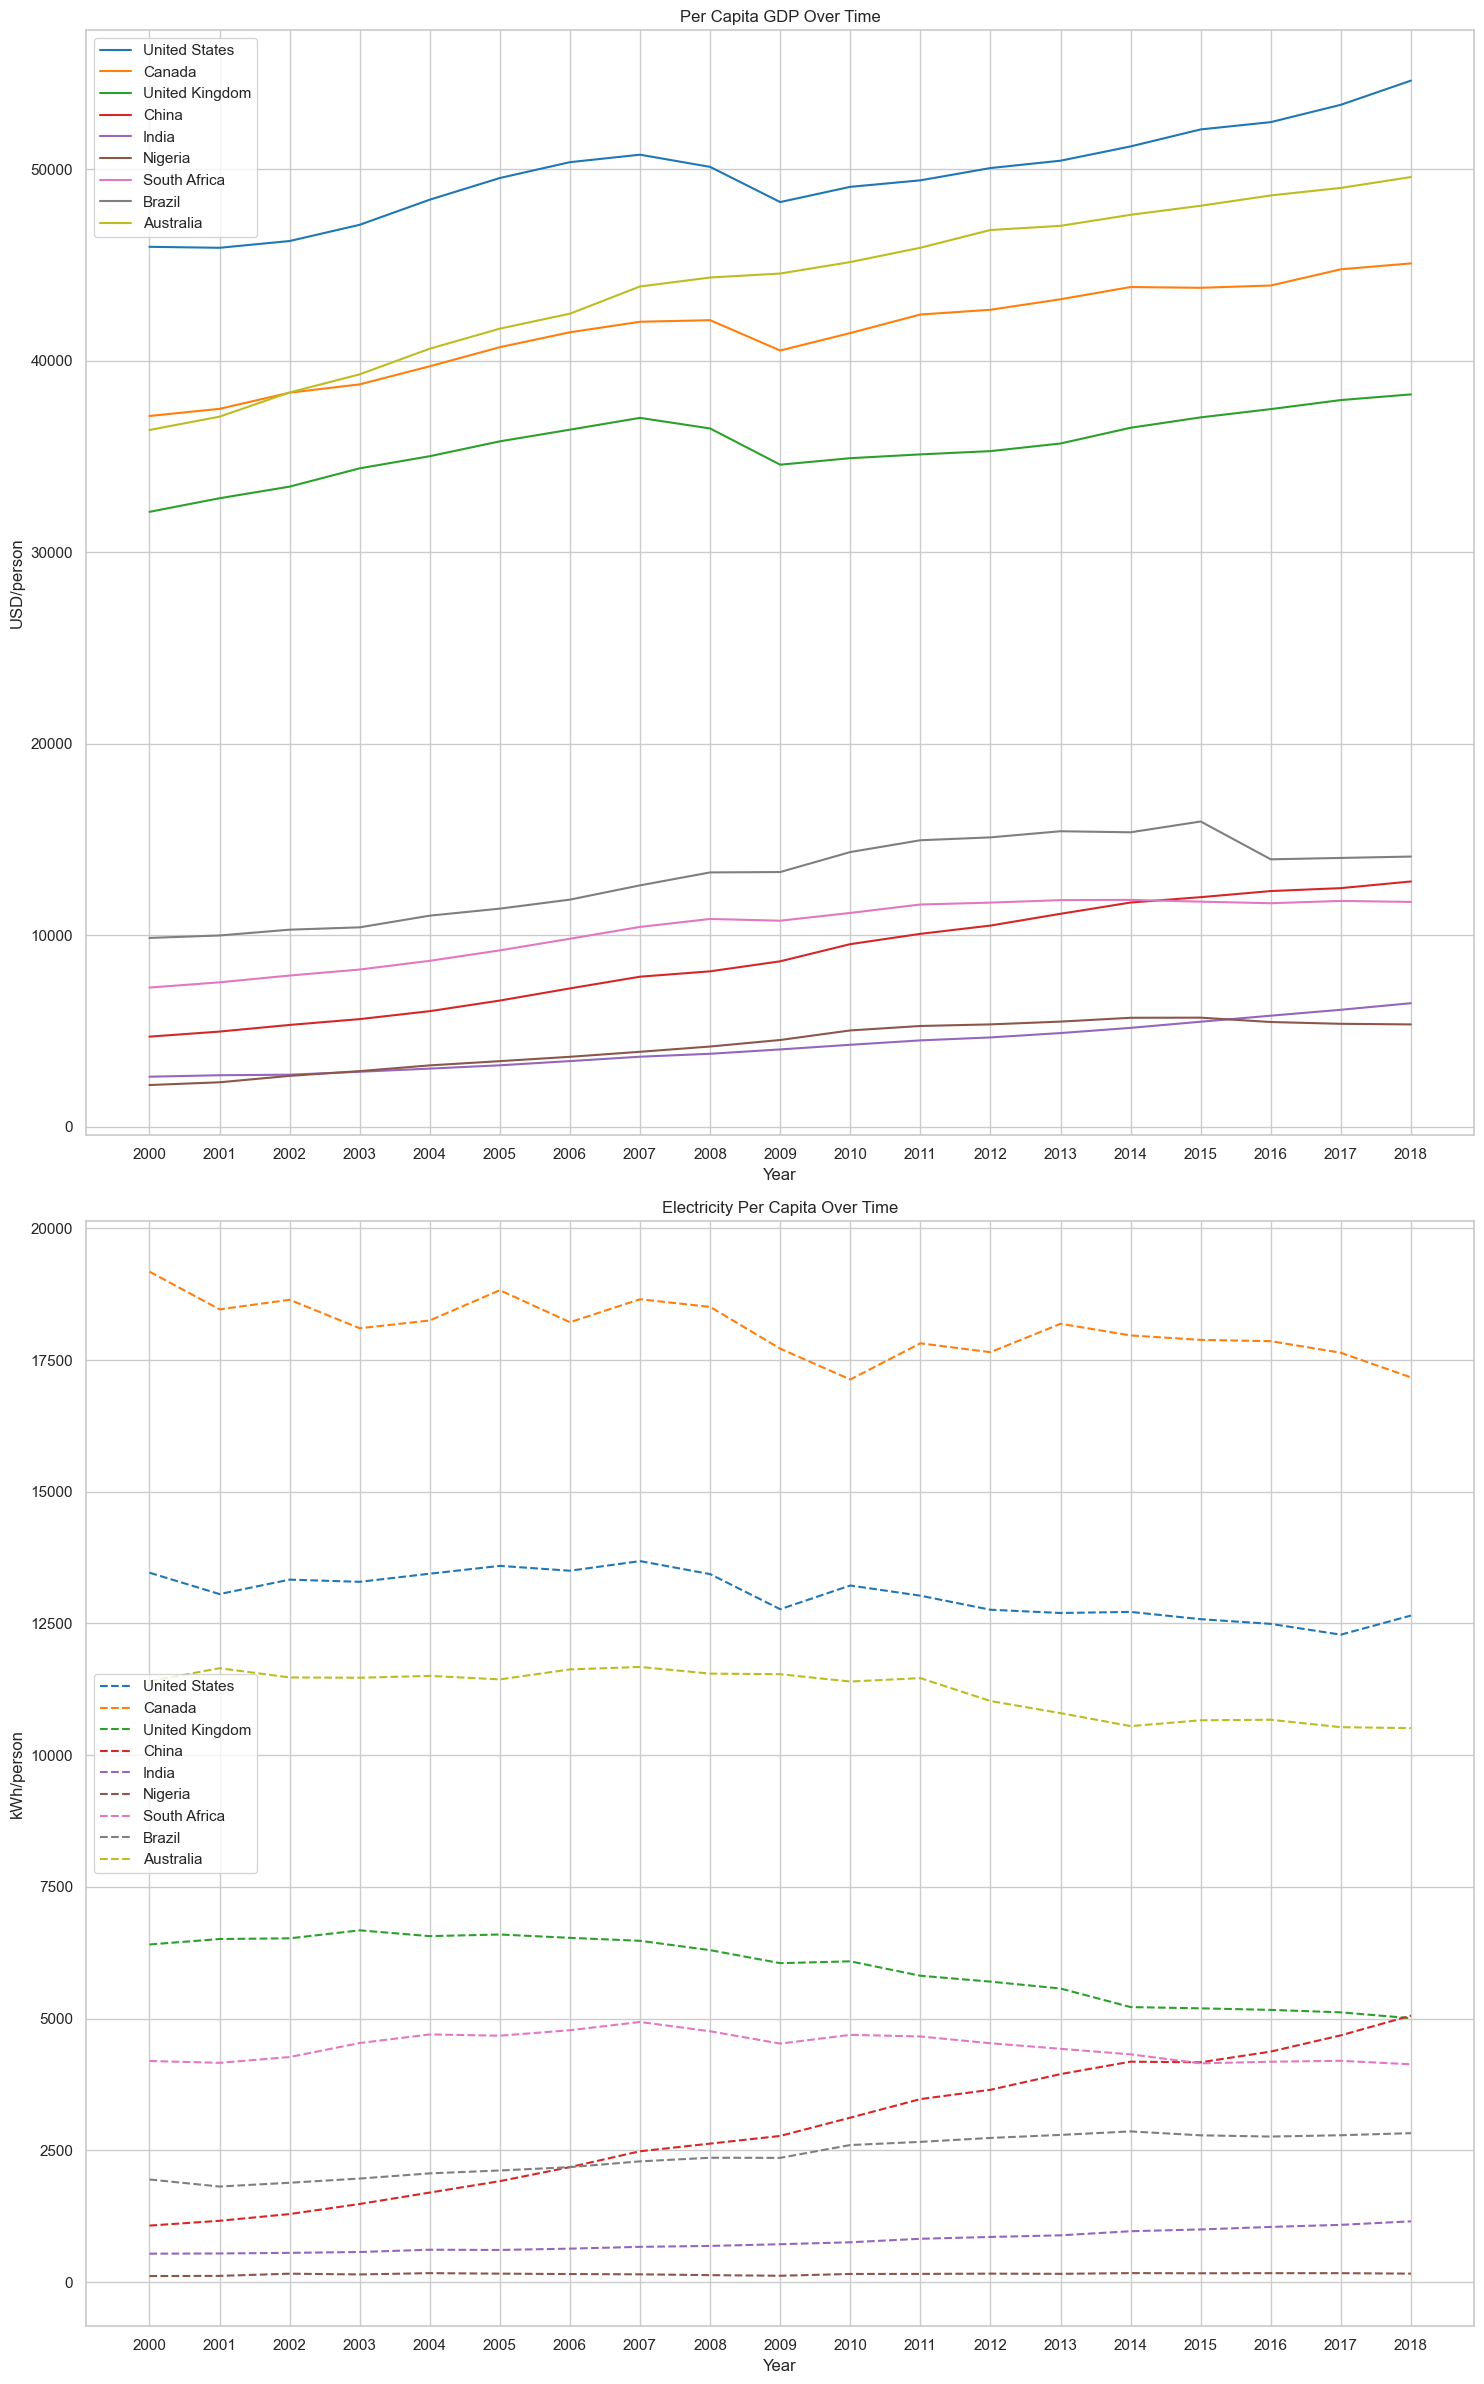

In [4]:
from matplotlib.ticker import MaxNLocator

# 计算人均 GDP
filtered_data_country = df[(df['country'].isin(selected_countries)) & (df['year'] >= 2000) & (df['year'] <= 2018)].copy()
filtered_data_country['per_gdp'] = filtered_data_country['gdp'] / filtered_data_country['population']

# 设置图表整体风格
sns.set(style="whitegrid")

# 创建颜色列表，用于绘图
colors = sns.color_palette("tab10", len(selected_countries))

# 准备绘图
fig, axs = plt.subplots(2, 1, figsize=(15, 24))

# 遍历每个国家，绘制人均 GDP
for i, country in enumerate(selected_countries):
    country_data = filtered_data_country[filtered_data_country['country'] == country]
    axs[0].plot(country_data['year'], country_data['per_gdp'], label=country, color=colors[i], linestyle='-')
axs[0].set_title('Per Capita GDP Over Time')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('USD/person')
axs[0].legend()

# 遍历每个国家，绘制人均总发电量
for i, country in enumerate(selected_countries):
    country_data = filtered_data_country[filtered_data_country['country'] == country]
    axs[1].plot(country_data['year'], country_data['per_capita_electricity'], label=country, color=colors[i], linestyle='--')
axs[1].set_title('Electricity Per Capita Over Time')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('kWh/person')
axs[1].legend()

# 设置横坐标的间隔
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

# 设置横坐标刻度间隔为1年
axs[0].set_xticks(np.arange(2000, 2019, step=1))
axs[1].set_xticks(np.arange(2000, 2019, step=1))

# 调整布局和显示图表
plt.tight_layout()
plt.show()



- 由上述两个折线图可以看出：在大多数国家，人均GDP随时间整体呈上升趋势，人均总用电量在不同国家并不统一。人均GDP变化由于社会经济水平发展向好，人均用电量总量各国差异大可能与各国能源结构、各国自身与能源有关政策有关。

## 1.3 代表性国家人均GDP和人均发电总量的箱型图
- 利用上述面板数据进一步绘图

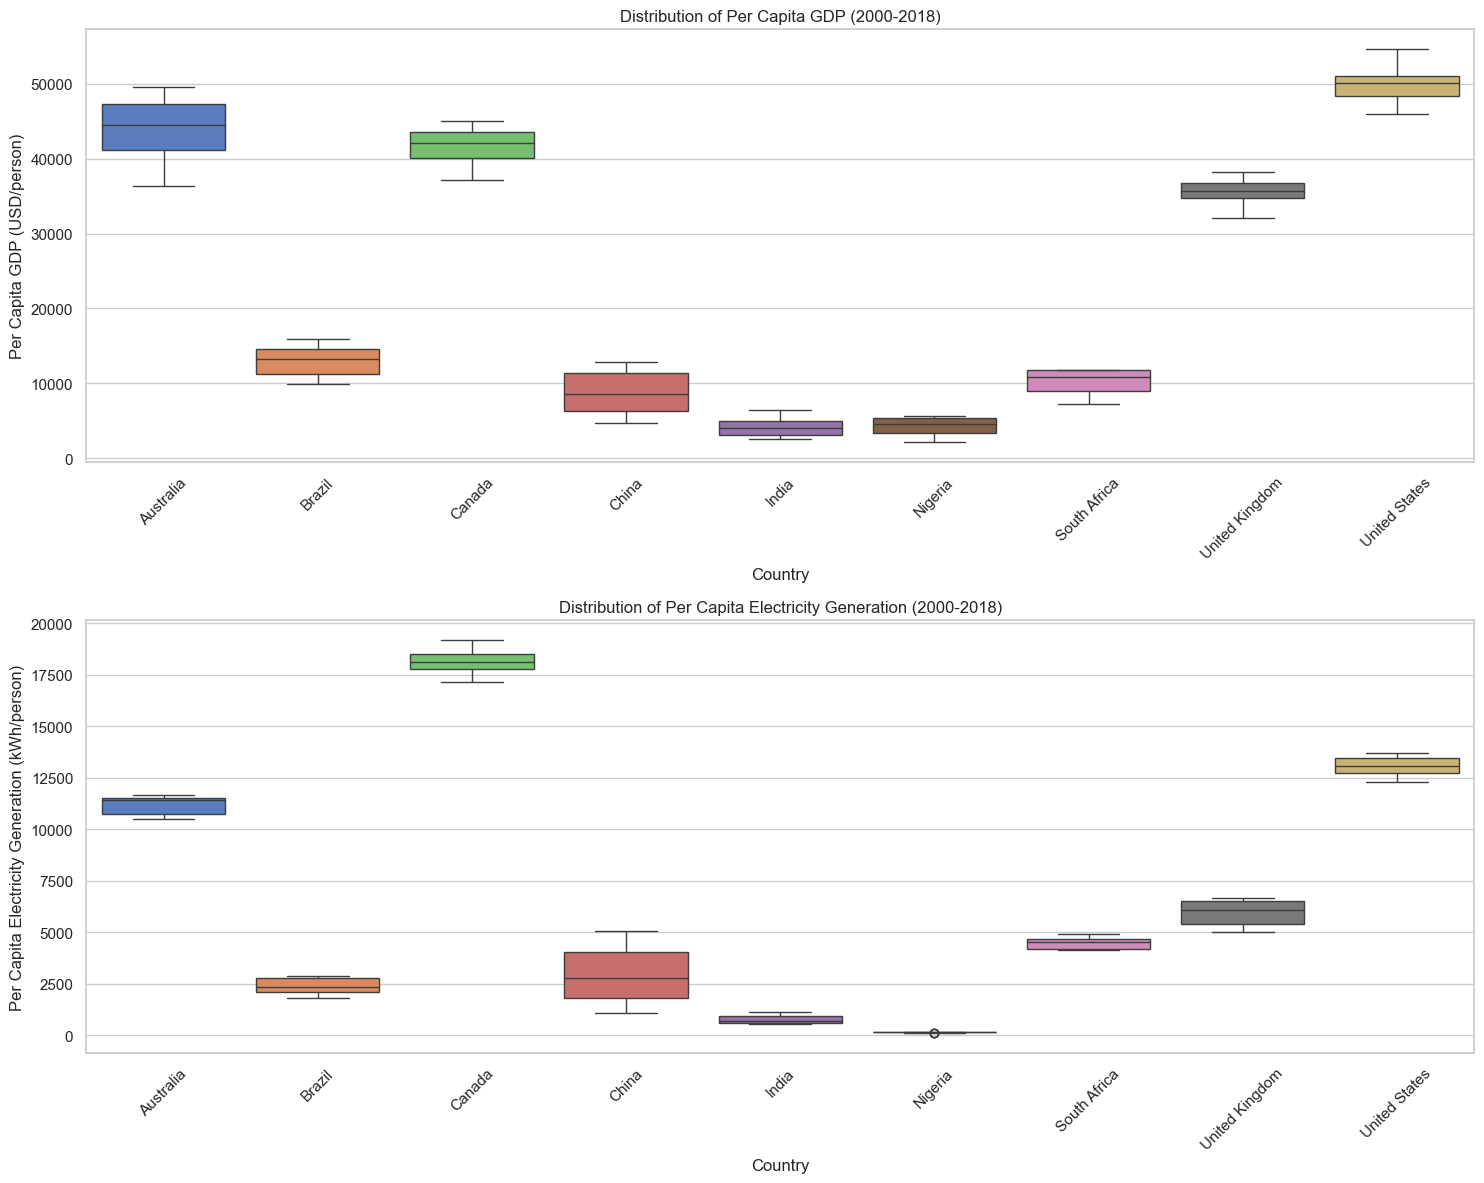

In [5]:
# 设置图表风格
sns.set(style="whitegrid")

# 创建一个包含两个子图的图表
fig, axs = plt.subplots(2, 1, figsize=(15, 12))

# 第一个箱型图：人均 GDP
sns.boxplot(x='country', y='per_gdp', hue='country', data=filtered_data_country, palette='muted', ax=axs[0], legend=False)
axs[0].set_title('Distribution of Per Capita GDP (2000-2018)')
axs[0].set_xlabel('Country')
axs[0].set_ylabel('Per Capita GDP (USD/person)')
axs[0].tick_params(axis='x', rotation=45)

# 第二个箱型图：人均发电量
sns.boxplot(x='country', y='per_capita_electricity', hue='country', data=filtered_data_country, palette='muted', ax=axs[1], legend=False)
axs[1].set_title('Distribution of Per Capita Electricity Generation (2000-2018)')
axs[1].set_xlabel('Country')
axs[1].set_ylabel('Per Capita Electricity Generation (kWh/person)')
axs[1].tick_params(axis='x', rotation=45)

# 调整布局
plt.tight_layout()
plt.show()

- 分析：由上述两图可知，各国的人均GDP随时间变化不大，发达国家的人均GDP显著高于发展中国家；人均总发电量的图示结果与人均GDP基本吻合，发达国家的人均总发电量显著高于发展中国家；说明两者可能存在一定关联。

## 1.4 我国不同电力来源的堆叠图与我国各类能源消耗随时间变化的折线图
- 重点关注我国电力能源情况
- 考虑以下来源：
    - 生物能源（`Bioenergy`）：生物能源作为一种可再生能源，占据一定比例。
    - 太阳能（`Solar`）：太阳能发电作为清洁能源，也有一定的产量。
    - 风能（`Wind`）：风能是中国的重要电力来源之一，随着风力发电技术的发展，产量逐渐增加。
    - 水力发电（`Hydropower`）：水力发电在中国具有重要地位，占据大部分电力发电量。
    - 核能（`Nuclear`）：核能作为清洁能源的代表，也有一定的电力产量。
    - 石油（`Oil`）：石油作为传统能源，依然对中国电力供应有所贡献。
    - 天然气（`Gas`）：天然气是清洁能源之一，也有一定电力产量。
    - 煤炭（`Coal`）：煤炭作为传统主要能源，依然在中国占据很大的比例，但随着清洁能源的发展，其比重逐渐减小。


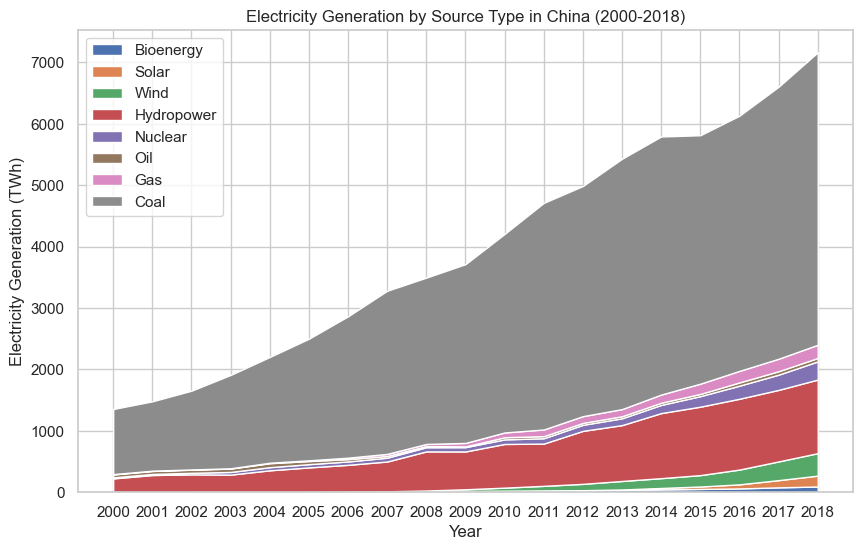

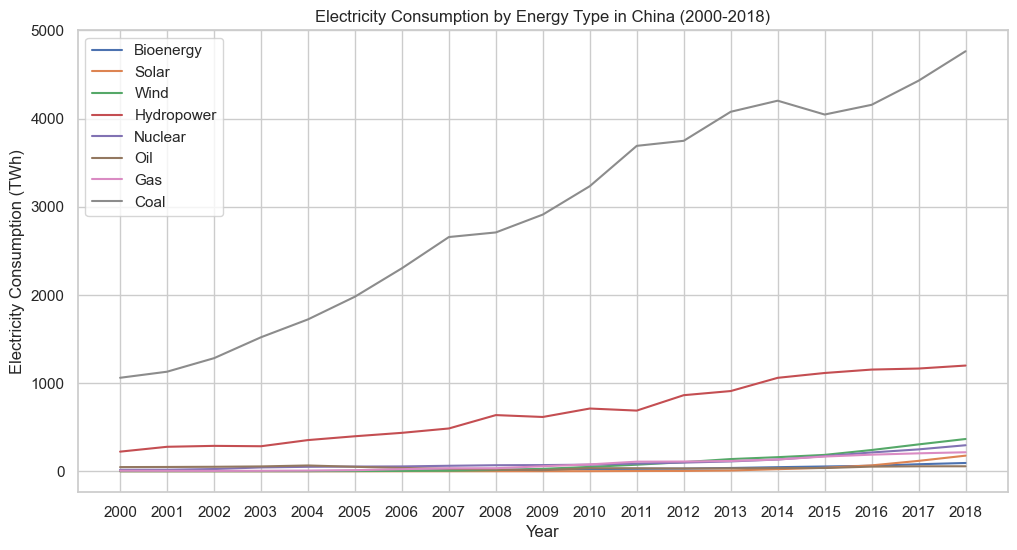

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 创建堆叠型图
fig, ax = plt.subplots(figsize=(10, 6))

China_data = df[(df['country']=='China') & (df['year'] >= 2000) & (df['year'] <= 2018)]

# 堆叠不同电力来源的数据
# colors = ['#8E5EC2', '#DC5EAF', '#FF718F', '#FF9870', '#FFC85F', '#F9F871', '#3E73D4', '#009EFC']
ax.stackplot(China_data['year'], China_data['biofuel_electricity'], China_data['solar_electricity'], China_data['wind_electricity'], China_data['hydro_electricity'], China_data['nuclear_electricity'], China_data['oil_electricity'], China_data['gas_electricity'], China_data['coal_electricity'], labels=['Bioenergy', 'Solar', 'Wind', 'Hydropower', 'Nuclear', 'Oil', 'Gas', 'Coal'])
ax.set_title('Electricity Generation by Source Type in China (2000-2018)')
ax.set_xlabel('Year')
ax.set_ylabel('Electricity Generation (TWh)')

# 添加图例
ax.legend(loc='upper left')

# 设置刻度
plt.xticks(np.arange(2000, 2019, step=1))  # 设置横坐标刻度间隔为1的整数

# 显示图表
plt.show()


# 提取各类能源的消耗数据
years = China_data['year']
biofuel_electricity = China_data['biofuel_electricity']
solar_electricity = China_data['solar_electricity']
wind_electricity = China_data['wind_electricity']
hydro_electricity = China_data['hydro_electricity']
nuclear_electricity = China_data['nuclear_electricity']
oil_electricity = China_data['oil_electricity']
gas_electricity = China_data['gas_electricity']
coal_electricity = China_data['coal_electricity']

# 设置能源类型标签
labels = ['Bioenergy', 'Solar', 'Wind', 'Hydropower', 'Nuclear', 'Oil', 'Gas', 'Coal']

# 创建能源消耗的变化图
plt.figure(figsize=(12, 6))
plt.plot(years, biofuel_electricity, label='Bioenergy')
plt.plot(years, solar_electricity, label='Solar')
plt.plot(years, wind_electricity, label='Wind')
plt.plot(years, hydro_electricity, label='Hydropower')
plt.plot(years, nuclear_electricity, label='Nuclear')
plt.plot(years, oil_electricity, label='Oil')
plt.plot(years, gas_electricity, label='Gas')
plt.plot(years, coal_electricity, label='Coal')

# 添加标签和标题
plt.xlabel('Year')
plt.ylabel('Electricity Consumption (TWh)')
plt.title('Electricity Consumption by Energy Type in China (2000-2018)')

# 添加图例
plt.legend(labels, loc='upper left')

# 设置刻度
plt.xticks(np.arange(2000, 2019, step=1))  # 设置横坐标刻度间隔为1的整数

# 显示图表
plt.grid(True)
plt.show()

- 分析：我国的能源结构中煤炭等化石燃料占比较高，各种能源发电消耗量都随时间有所上升，其中煤炭与水力发电增加最为明显。

## 1.5 各国人均发电量/人均一次能源消耗与发展水平（人均GDP）
- 以截面数据（2018年）为例
- 绘制散点图，以显示人均发电量/人均一次能源消耗与人均GDP之间的关系。

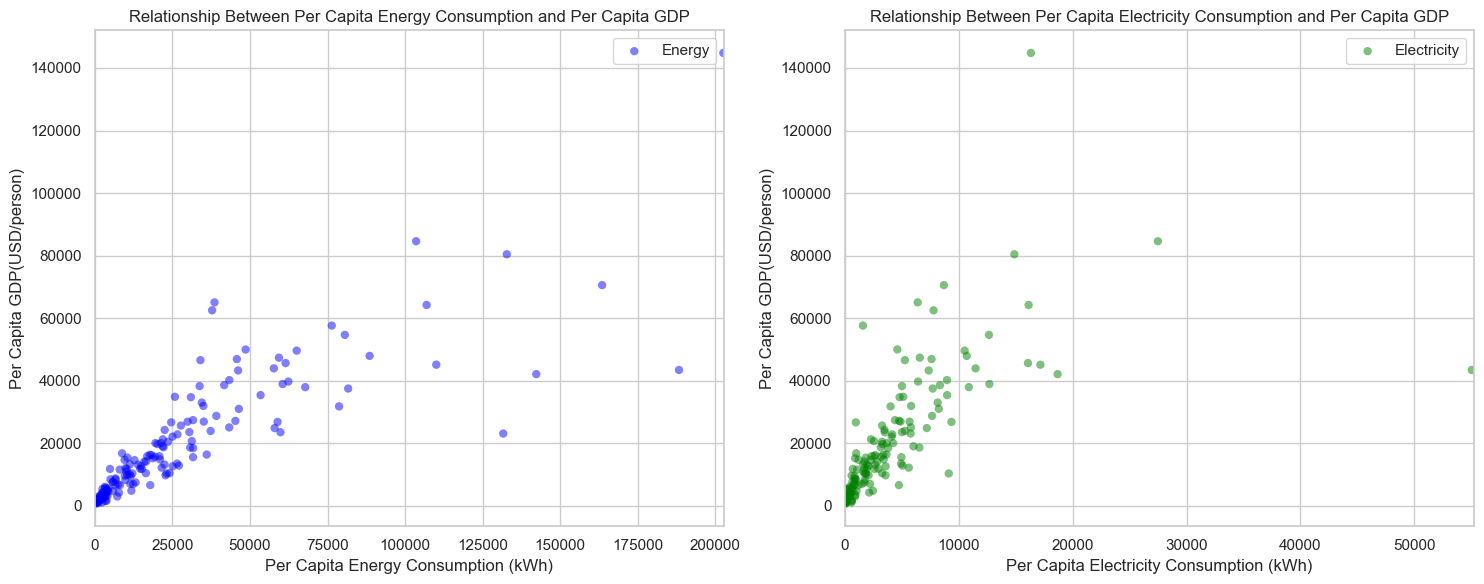

In [7]:
import matplotlib.pyplot as plt

# 使用通配符去掉包含指定字符串的行
exclude_strings = ['Africa', 'Antarctica', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
selected_data_country = df[~df['country'].str.contains('|'.join(exclude_strings))]

# 选取特定年份的数据
selected_data_year = selected_data_country[(selected_data_country['year'] >= 2000) & (selected_data_country['year'] <= 2018)]
selected_data_year = selected_data_year.copy()
selected_data_year['per_gdp'] = selected_data_year['gdp'] / selected_data_year['population']

selected_data_2018 = selected_data_year[(selected_data_year['year'] == 2018)]

# 创建画布和子图
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 散点图1
axes[0].scatter(selected_data_2018['energy_per_capita'], selected_data_2018['per_gdp'], alpha=0.5, c='blue', label='Energy', edgecolors='none')
axes[0].set_xlabel('Per Capita Energy Consumption (kWh)')
axes[0].set_ylabel('Per Capita GDP(USD/person)')
axes[0].set_title('Relationship Between Per Capita Energy Consumption and Per Capita GDP')
axes[0].grid(True)

# 散点图2
axes[1].scatter(selected_data_2018['per_capita_electricity'], selected_data_2018['per_gdp'], alpha=0.5, c='green', label='Electricity', edgecolors='none')
axes[1].set_xlabel('Per Capita Electricity Consumption (kWh)')
axes[1].set_ylabel('Per Capita GDP(USD/person)')
axes[1].set_title('Relationship Between Per Capita Electricity Consumption and Per Capita GDP')
axes[1].grid(True)

# 忽略缺失数据点
axes[0].set_xlim(0, selected_data_2018['energy_per_capita'].max() + 200)
axes[1].set_xlim(0, selected_data_2018['per_capita_electricity'].max() + 200)

# 显示图例
axes[0].legend()
axes[1].legend()

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()

- 分析：由上述散点图的分布情况可知各国人均发电量/人均一次能源消耗与发展水平可能存在一定正相关，具体关系还需后续进一步分析。

# 2 参数估计与区间估计
- 针对截面数据，采用2018年
- 考虑世界范围内的以下变量：
- 人均总发电量（`per_capita_electricity`）,单位为千瓦时每人。
- 人均一次能源消耗（`energy_per_capita`），单位为千瓦时每人。
- 一次能源消费的年度百分比变化（`energy_cons_change_pct`）
- 人均可再生能源消耗量（`renewables_energy_per_capita`），单位为千瓦时每人。
- 可再生能源消费的年度百分比变化（`renewables_cons_change_pct`）
- 假定服从正态分布
- 由于总体分布的方差未知，故统计量$t = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$服从t分布。
   其中：
   - $t$：t统计量。
   - $\bar{x}$：样本均值。
   - $\mu$：总体均值的假设值。
   - $s$：样本标准差。
   - $n$：样本容量。
- 估计各指标平均值
- 计算各指标的95%的置信区间【总体参数有95%的概率落在区间内】

In [8]:
# 定义要分析的变量列表
variables_to_analyze = ['per_capita_electricity', 'energy_per_capita', 'energy_cons_change_pct', 'renewables_energy_per_capita', 'renewables_cons_change_pct']

# 遍历每个变量并计算平均值和置信区间
for variable in variables_to_analyze:
    # 提取数据
    data = selected_data_2018[variable]
    
    # 计算平均值
    mean = data.mean()
    
    # 计算标准差
    std = data.std()
    
    # 计算置信区间
    confidence_interval = stats.norm.interval(0.95, loc=mean, scale=std / len(data)**0.5)
    
    # 打印结果
    print(f"{variable}的平均值：{mean}")
    print(f"{variable}的95%置信区间：{confidence_interval}")
    print()

per_capita_electricity的平均值：3758.18223853211
per_capita_electricity的95%置信区间：(3086.320715513352, 4430.043761550869)

energy_per_capita的平均值：26362.710159090915
energy_per_capita的95%置信区间：(22219.404582814183, 30506.015735367648)

energy_cons_change_pct的平均值：2.7831645021645026
energy_cons_change_pct的95%置信区间：(2.008899887362347, 3.557429116966658)

renewables_energy_per_capita的平均值：7348.294413333333
renewables_energy_per_capita的95%置信区间：(4987.203583311155, 9709.385243355511)

renewables_cons_change_pct的平均值：7.678626506024097
renewables_cons_change_pct的95%置信区间：(5.724885731406917, 9.632367280641276)



# 3 假设检验


## 3.1 问题1：人均GDP最高的国家的人均用电总量是否明显高于人均GDP最低的国家？
- 前提：假设两组数据相互独立且服从正态分布。
- 时间段为2000年-2018年
- 先找到该时间段内人均GDP最高的国家A，记该国人均用电总量的均值为$\mu_1$,方差为$\sigma_1^2$；人均GDP最低的国家B，记该国人均用电总量的均值为$\mu_2$,方差为$\sigma_2^2$
- 使用样本数据计算得A国人均用电总量的样本均值为$X_A$，样本方差为$S_A^2$，B国人均用电总量的样本均值为$X_B$，样本方差为$S_B^2$

### 3.1.1 方差齐性检验
- 原假设$H_0: \sigma_1^2=\sigma_2^2$
- 备择假设$H_1: \sigma_1^2 \neq \sigma_2^2$
- 检验统计量为：$F = \frac{s_1^2}{s_2^2}$
- 如果 F 统计量的计算结果显著大于 F 分布的临界值（通常在特定显著性水平下），则说明两个总体的方差不相等，可以拒绝零假设。如果 F 统计量的计算结果不显著大于 F 分布的临界值，则无法拒绝零假设，表示两个总体的方差相等。


In [9]:
# 按照国家分组并计算每个国家在这段时间内的平均人均 GDP
average_per_gdp_by_country = selected_data_year.groupby('country')['per_gdp'].mean().reset_index()

# 找到平均人均 GDP 最高的国家和最低的国家
highest_per_gdp_country = average_per_gdp_by_country[average_per_gdp_by_country['per_gdp'] == average_per_gdp_by_country['per_gdp'].max()]
lowest_per_gdp_country = average_per_gdp_by_country[average_per_gdp_by_country['per_gdp'] == average_per_gdp_by_country['per_gdp'].min()]

print("人均 GDP 最高的国家：")
print(highest_per_gdp_country)

print("人均 GDP 最低的国家：")
print(lowest_per_gdp_country)


人均 GDP 最高的国家：
    country       per_gdp
190   Qatar  110590.69331
人均 GDP 最低的国家：
                         country     per_gdp
54  Democratic Republic of Congo  678.733474


In [30]:
from scipy import stats

# 分别计算两个国家的人均总发电量的样本方差
variance_A = selected_data_year[selected_data_year['country'] == 'Qatar']['per_capita_electricity'].values.var()
variance_B = selected_data_year[selected_data_year['country'] == 'Democratic Republic of Congo']['per_capita_electricity'].values.var()

print(variance_A)
print(variance_B)

# 计算 F 统计量
F_statistic = variance_A / variance_B

# 设置显著性水平（例如0.05）
alpha = 0.05

# 查找 F 分布的临界值
dof_A = len(selected_data_year[selected_data_year['country'] == 'Qatar']) - 1
dof_B = len(selected_data_year[selected_data_year['country'] == 'Democratic Republic of Congo']) - 1
critical_value_1 = stats.f.ppf(1 - alpha/2, dof_A, dof_B)
critical_value_2 = stats.f.ppf(alpha/2, dof_A, dof_B)

# 判断是否拒绝原假设（拒绝域双侧）
if F_statistic >= critical_value_1 or F_statistic <= critical_value_2:
    print("拒绝原假设，认为两个总体的方差不相等。")
else:
    print("无法拒绝原假设，认为两个总体的方差相等。")

1026288.6663227199
44.090463418282525
拒绝原假设，认为两个总体的方差不相等。


### 3.1.2 异方差独立样本t检验
- 单侧检验
- 原假设$H_0$: 国家A的人均用电总量均值小于等于国家B的人均用电总量均值 $\mu_1 \leq \mu_2$
- 备择假设$H_1$: 国家A的人均用电总量均值大于国家B的人均用电总量均值 $\mu_1 \gt \mu_2$
- 统计量$t = \frac{{X_1 - X_2}}{{\sqrt{\frac{{S_1^2}}{{n_1}} + \frac{{S_2^2}}{{n_2}}}}}$
- 自由度$df = \frac{{\left(\frac{{S_1^2}}{{n_1}} + \frac{{S_2^2}}{{n_2}}\right)^2}}{{\frac{{\left(\frac{{S_1^2}}{{n_1}}\right)^2}}{{n_1 - 1}} + \frac{{\left(\frac{{S_2^2}}{{n_2}}\right)^2}}{{n_2 - 1}}}}$
- 使用显著性水平（$\alpha=0.05$）查找 t 分布的临界值。比较计算得到的 t 统计量和 t 分布的临界值。如果 $t \geq t_{\text{critical}}$，则拒绝原假设，认为两个国家的人均用电总量均值显著不同。

注：这个检验假设两个样本的方差是不相等的，因此使用了 Welch's t-test（自由度校正）。

In [32]:
# 分别计算两个国家的人均用电总量的样本均值和样本大小
mean_A = selected_data_year[selected_data_year['country'] == 'Qatar']['per_capita_electricity'].mean()
mean_B = selected_data_year[selected_data_year['country'] == 'Democratic Republic of Congo']['per_capita_electricity'].mean()
n_A = len(selected_data_year[selected_data_year['country'] == 'Qatar'])
n_B = len(selected_data_year[selected_data_year['country'] == 'Democratic Republic of Congo'])

# 分别计算两个国家的人均用电总量的样本标准差
std_A = selected_data_year[selected_data_year['country'] == 'Qatar']['per_capita_electricity'].std()
std_B = selected_data_year[selected_data_year['country'] == 'Democratic Republic of Congo']['per_capita_electricity'].std()

# 计算检验统计量 t
t_statistic = (mean_A - mean_B) / (std_A**2 / n_A + std_B**2 / n_B)**0.5

# 计算自由度
dof = (std_A**2 / n_A + std_B**2 / n_B)**2 / ((std_A**2 / n_A)**2 / (n_A - 1) + (std_B**2 / n_B)**2 / (n_B - 1))

# 使用显著性水平（例如0.05）查找 t 分布的临界值
alpha = 0.05
critical_value = stats.t.ppf(1 - alpha, dof)

# 判断是否拒绝原假设（拒绝域单侧）
if t_statistic >= critical_value:
    print("拒绝原假设，人均GDP最高的国家的人均用电总量明显高于人均GDP最低的国家。")
else:
    print("无法拒绝原假设，人均GDP最高的国家的人均用电总量不明显高于人均GDP最低的国家。")

拒绝原假设，人均GDP最高的国家的人均用电总量明显高于人均GDP最低的国家。


## 3.2 问题2:人均用电总量高低与是否为发达国家是否有关联？
- 以2018年的截面数据为例进行分析
    - 零假设 $H_0$: 人均用电总量与是否为发达国家无关，即两者独立。
    - 备择假设 $H_1$: 人均用电总量与是否为发达国家有关，即两者不独立。
- 根据零假设，计算每个单元格的期望频数。期望频数表示在零假设下，每个单元格中的样本数量应该是多少。
    - 变量A：发达国家、发展中国家
    - 变量B：人均用电总量高、人均用电总量低
- 计算卡方统计量：使用观察频数和期望频数计算卡方统计量。卡方统计量衡量了观察频数与期望频数之间的差异。
- 确定自由度：自由度的计算取决于列联表的维度。一般情况下，自由度为 $(r-1) \times (c-1)$，其中 $r$是行数，$c$ 是列数。
- 根据设定的显著性水平（例如，$\alpha=0.05$，查找卡方分布的临界值。比较卡方统计量与临界值：比较计算得到的卡方统计量与卡方分布的临界值。如果计算得到的卡方统计量大于临界值，就拒绝零假设，认为人均用电总量与是否为发达国家有关。否则，无法拒绝零假设，认为两者不相关。


In [12]:
from scipy.stats import chi2_contingency

selected_data_2018_cleaned_1 =  selected_data_2018.dropna(subset=['iso_code', 'per_capita_electricity'])

# 创建包含发达国家ISO代码的列表
developed_countries = [
    "AUS", "AUT", "BEL", "CAN", "CYP", "CZE", "DNK", "EST", "FIN", "FRA",
    "DEU", "GRC", "HKG", "ISL", "IRL", "ISR", "ITA", "JPN", "KOR", "LVA",
    "LTU", "LUX", "MAC", "MLT", "NLD", "NZL", "NOR", "PRT", "PRI", "SMR",
    "SGP", "SVK", "SVN", "ESP", "SWE", "CHE", "TWN", "GBR", "USA"
]

# 使用 .copy() 避免 SettingWithCopyWarning
selected_data_2018_cleaned_1 = selected_data_2018_cleaned_1.copy()

# 标记发达国家
selected_data_2018_cleaned_1['Developed'] = selected_data_2018_cleaned_1['iso_code'].apply(lambda x: '1' if x in developed_countries else '0')

# 计算per_capita_electricity的平均值
mean_per_capita_electricity = selected_data_2018_cleaned_1['per_capita_electricity'].mean()

# 使用 .loc 进行赋值
selected_data_2018_cleaned_1['electricity'] = np.where(selected_data_2018_cleaned_1['per_capita_electricity'] > mean_per_capita_electricity, 1, 0)

country_names_2018 = selected_data_2018_cleaned_1['country']
is_developed = selected_data_2018_cleaned_1['Developed']
per_capita_electricity_2018_classification = selected_data_2018_cleaned_1['electricity']

data = {'Country': country_names_2018, 'IS_developed': is_developed, 'per_capita_electricity_2018_classification': per_capita_electricity_2018_classification}
table = pd.DataFrame(data)
print(table)

# 创建观察频数表
observed_freq_table = pd.crosstab(table['IS_developed'], table['per_capita_electricity_2018_classification'])

print(observed_freq_table)
# 执行卡方独立性检验
chi2, p, _, _ = chi2_contingency(observed_freq_table)

# 显示卡方检验结果
print("卡方检验统计量 (Chi-squared):", chi2)
print("P 值 (P-value):", p)

# 设置显著性水平
alpha = 0.05

# 判断是否拒绝零假设
if p < alpha:
    print("拒绝零假设，人均用电总量高低与是否为发达国家存在关联。")
else:
    print("无法拒绝零假设，人均用电总量高低与是否为发达国家无关。")

              Country IS_developed  per_capita_electricity_2018_classification
141       Afghanistan            0                                           0
625           Albania            0                                           0
747           Algeria            0                                           0
790    American Samoa            0                                           0
912            Angola            0                                           0
...               ...          ...                                         ...
20891         Vietnam            0                                           0
21082  Western Sahara            0                                           0
21247           Yemen            0                                           0
21462          Zambia            0                                           0
21585        Zimbabwe            0                                           0

[212 rows x 3 columns]
per_capita_electricity_2018_

# 4 回归分析
- 采用2018年的截面数据
- **探究影响人均一次能源消耗的因素**：执行多元线性回归分析，以确定影响人均一次能源消耗（每人千瓦时）的主要因素。可能的自变量包括人均GDP（美元没人）、人均总发电量（以每人千瓦时为单位）等。
- 关于因果关系的考虑：
    - 人均GDP推动人均能源消耗： 人均GDP的增加通常伴随着对生活品质的提升，引发了对能源密集型活动的需求增长，如电力使用、交通和制造业。因此，人均GDP的上升被视为能源消耗增长的推动因素。
    - 能源消耗拉动GDP生产： 更多的能源投入到生产活动中，提高了生产效率，推动了GDP的增长。有效的能源使用可以降低生产成本，促进产值的提升。这种情况下，能源消耗被认为是经济生产的拉动力，对GDP产生积极影响。
    - 由于本数据集基于能源，故选择一次能源消耗作为被解释变量（因变量）。
## 4.1 回归模型的建立

                            OLS Regression Results                            
Dep. Variable:      energy_per_capita   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     392.0
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           1.34e-62
Time:                        15:10:54   Log-Likelihood:                -1803.8
No. Observations:                 164   AIC:                             3614.
Df Residuals:                     161   BIC:                             3623.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1670

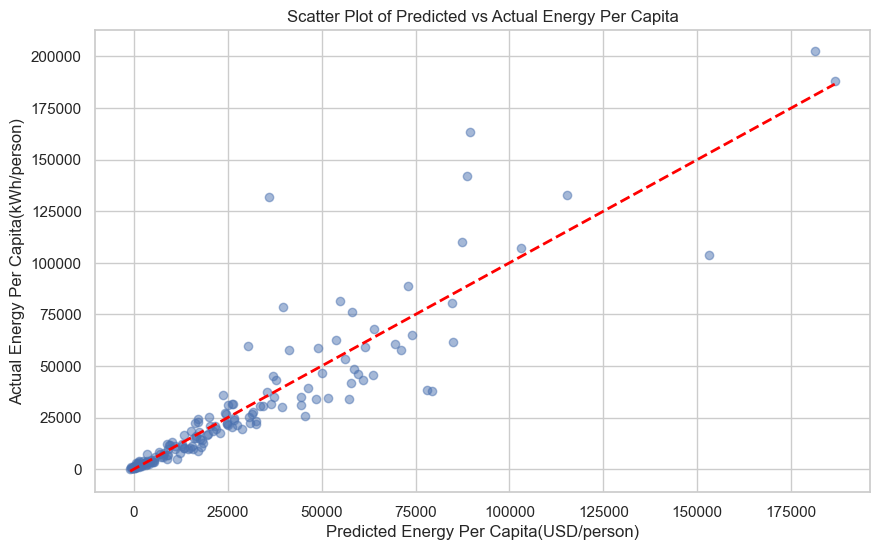

In [13]:
import statsmodels.api as sm

# 去除缺失值
selected_data_2018_cleaned = selected_data_2018.dropna(subset=['per_gdp', 'per_capita_electricity', 'energy_per_capita'])

# 准备自变量
X = selected_data_2018_cleaned[['per_gdp', 'per_capita_electricity']]

# 添加截距项
X = sm.add_constant(X)

# 因变量
y = selected_data_2018_cleaned['energy_per_capita']

# 拟合线性回归模型
model = sm.OLS(y, X).fit()

# 计算回归方程的值
predicted_values = model.predict(X)

# 打印回归分析结果
print(model.summary())

# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, y, alpha=0.5)

# 添加标签和标题
plt.xlabel('Predicted Energy Per Capita(USD/person)')
plt.ylabel('Actual Energy Per Capita(kWh/person)')
plt.title('Scatter Plot of Predicted vs Actual Energy Per Capita')

# 添加回归直线
plt.plot([min(predicted_values), max(predicted_values)], [min(predicted_values), max(predicted_values)], color='red', linestyle='--', linewidth=2)

# 显示图表
plt.grid(True)
plt.show()


- **分析**：
  - **模型拟合度：**
      - R-squared（拟合度）：0.830
      - Adj. R-squared（调整后的拟合度）：0.8287
      这些指标表示模型解释了因变量（`energy_per_capita`）变异性的83%。调整后的拟合度考虑了模型中自变量的数量。

  - **参数估计：**
      - 常数项（截距项，`const`）：-1670.1188
      - 人均GDP系数（`per_gdp`）：0.9641
      - 人均电力消耗系数（`per_capita_electricity`）：2.6600
      这些系数表示了自变量对因变量的影响。例如，每增加一单位的人均GDP，能源消耗平均会增加0.9641单位。

  - **统计显著性：**
      - F-statistic：392.0
      - Prob (F-statistic)：1.34e-62
      F统计量用于检验整个模型的统计显著性。在这里，P值非常小，表明模型是统计显著的，至少有一个自变量对因变量有显著影响。

  - **各自变量的显著性：**
      - 人均GDP（`per_gdp`）和人均电力消耗（`per_capita_electricity`）的系数P值均为0.000，表明它们对能源消耗都是显著的。

  - **残差分析：**
      - Omnibus统计量：125.290，Jarque-Bera（JB）统计量：2015.294
      这些统计量用于检验残差的正态性。在这里，P值接近于0，表明残差不服从正态分布，可能需要对模型进行调整。

  - **多重共线性：**
      - 条件数（Cond. No.）：3.87e+04
      高条件数可能表明模型中的自变量之间存在多重共线性。这可能导致对模型系数的解释不稳定。

## 4.2 多重共线性问题
- 原因：自变量相关的共同趋势、样本资料的限制(样本太少）
- 检验：计算方差膨胀因子、计算相关系数

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 计算VIF
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

# 选择自变量列
independent_variables = selected_data_2018_cleaned[['per_gdp', 'per_capita_electricity']]

# 计算相关系数矩阵
correlation_matrix = independent_variables.corr()

# 打印相关系数矩阵
print("Correlation Matrix:")
print(correlation_matrix)


                 Features       VIF
0                   const  1.897983
1                 per_gdp  1.786420
2  per_capita_electricity  1.786420
Correlation Matrix:
                         per_gdp  per_capita_electricity
per_gdp                 1.000000                0.663492
per_capita_electricity  0.663492                1.000000


- 分析：根据计算的VIF值，自变量之间的多重共线性问题并不严重。通常，VIF小于5表示较低的共线性，而VIF小于10表示中等共线性。相关系数矩阵显示per_gdp和per_capita_electricity之间的相关系数为0.6635，这表明两者之间存在一定的线性相关性，但不是非常高。
- 考虑使用岭回归克服多重共线性。

In [15]:
from sklearn.linear_model import Ridge

# 创建岭回归模型
ridge = Ridge(alpha=1.0)

# 拟合模型
ridge.fit(X, y)

# 打印系数
print("Coefficients:", ridge.coef_)

Coefficients: [0.         0.96411269 2.65996251]


- **分析**：
    - 截距项（const）的系数为0，截距项在模型中的影响被降低到了零，可能是因为正则化的影响。
    - `per_gdp` 的系数为0.964，表示每单位增加的 `per_gdp`，`energy_per_capita` 将增加约0.964个单位。这说明国家的经济水平与能源消耗之间存在正相关关系，即经济水平较高的国家 tend to have higher energy consumption per capita.
    - `per_capita_electricity` 的系数为2.66，表示每单位增加的 `per_capita_electricity`，`energy_per_capita` 将增加约2.66个单位。这说明国家的人均用电总量与能源消耗之间存在正相关关系，即人均用电总量较高的国家 tend to have higher energy consumption per capita.\
岭回归模型的系数受到正则化参数 `alpha` 的影响，建议在具体应用中根据情况调整 `alpha` 以获得更好的模型性能。

## 4.3 异方差性
- 原因：横截面数据中由于样本点存在个体差异、遗漏重要解释变量
- 检验：采用White检验


In [16]:
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

# 执行White异方差性检验
white_test = sms.het_white(model.resid, X)
white_test_summary = lzip(["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"], white_test)

# 打印White异方差性检验结果
print("White异方差性检验结果:")
for item in white_test_summary:
    print(item)

White异方差性检验结果:
('LM Statistic', 18.55838352781592)
('LM-Test p-value', 0.002322180515478475)
('F-Statistic', 4.032167227673391)
('F-Test p-value', 0.001800634750911768)


- 分析：White异方差性检验结果显示在White异方差性检验中，LM统计量为18.56，对应的p值为0.0023,小于0.05。此外，F统计量为4.03，对应的F-Test p值为0.0018，小于0.05。模型的误差项方差在不同观测值之间不是恒定的，存在异方差现象。
- 修正：使用加权最小二乘法（WLS）来调整回归模型可。

In [17]:
import statsmodels.api as sm

# 去除缺失值
selected_data_2018_cleaned = selected_data_2018.dropna(subset=['per_gdp', 'per_capita_electricity', 'energy_per_capita'])

# 准备自变量
X = selected_data_2018_cleaned[['per_gdp', 'per_capita_electricity']]

# 添加截距项
X = sm.add_constant(X)

# 因变量
y = selected_data_2018_cleaned['energy_per_capita']

# 计算残差的平方
residuals_squared = model.resid ** 2

# 拟合异方差修正模型
wls_model = sm.WLS(y, X, weights=1 / residuals_squared).fit()

# 打印修正后的回归分析结果
print(wls_model.summary())

                            WLS Regression Results                            
Dep. Variable:      energy_per_capita   R-squared:                       0.993
Model:                            WLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.202e+04
Date:                Sun, 21 Jan 2024   Prob (F-statistic):          5.61e-176
Time:                        15:10:55   Log-Likelihood:                -1532.7
No. Observations:                 164   AIC:                             3071.
Df Residuals:                     161   BIC:                             3081.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1369

- **分析**：
  - **拟合度 (R-squared):** 0.993，表明模型能够解释目标变量变异的99.3%。
    
  - **调整后的拟合度 (Adj. R-squared):** 0.993，考虑了模型中的自变量数量。

  - **F统计量 (F-statistic):** 1.202e+04，整体上模型非常显著。

  - **P>|t| (系数的显著性):**
    - `const` 系数对应的p-value为0.000，表示常数项是显著的。
    - `per_gdp` 和 `per_capita_electricity` 的系数对应的p-value也均为0.000，表明它们在模型中是显著的。

  - **系数 (coef):**
    - `const` 系数为-1369.3917，表示当 `per_gdp` 和 `per_capita_electricity` 均为零时，`energy_per_capita` 的估计值。
    - `per_gdp` 和 `per_capita_electricity` 的系数分别为0.8946和2.7391，表示单位增加时，`energy_per_capita` 的估计值分别增加0.8946和2.7391。

  - **残差分析:**
    - Omnibus和Jarque-Bera的p-value均为0.000，表明残差不符合正态分布。
    
  - **Durbin-Watson统计量:** 1.828，接近2，表明残差之间可能存在轻微的自相关。

  - **条件数 (Cond. No.):** 8.66e+03，可能存在多重共线性问题，需要进一步分析自变量之间的关系。
    
根据分析结果，修正后的模型可以完美拟合数据，但残差不符合正态分布，可能存在多重共线性或其他数值问题。

## 4.4 内生解释变量问题
- 通常采用工具变量法，此处暂时难以找到合适的工具变量，故跳过

## 4.5 模型设定偏误问题
- 分类：关于解释变量选取的偏误（遗漏相关变量、多选无关变量）、关于模型函数形式选取的偏误

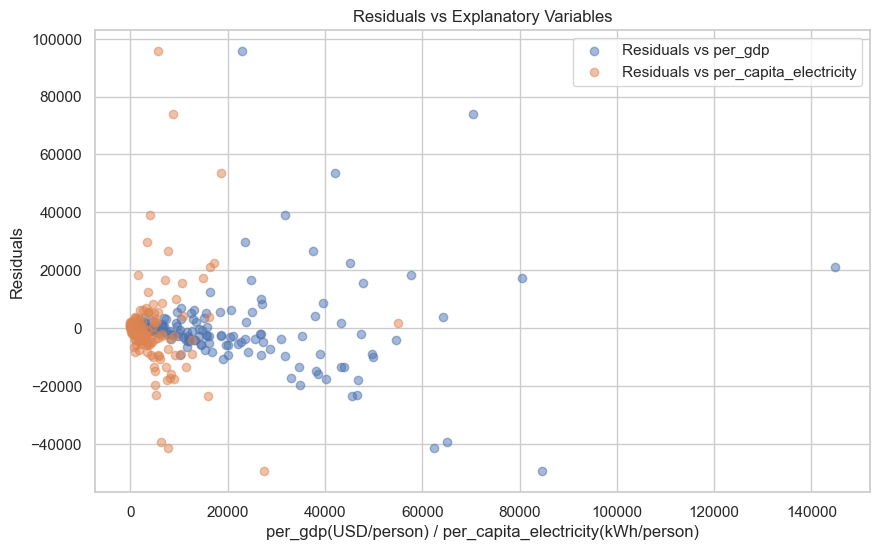

In [18]:
# 获取残差序列
residuals = model.resid

# 创建残差序列与解释变量的散点图
plt.figure(figsize=(10, 6))

# 绘制散点图
plt.scatter(selected_data_2018_cleaned['per_gdp'], residuals, alpha=0.5, label='Residuals vs per_gdp')
plt.scatter(selected_data_2018_cleaned['per_capita_electricity'], residuals, alpha=0.5, label='Residuals vs per_capita_electricity')

# 添加标签和标题
plt.xlabel('per_gdp(USD/person) / per_capita_electricity(kWh/person)')
plt.ylabel('Residuals')
plt.title('Residuals vs Explanatory Variables')

# 添加图例
plt.legend()

# 显示图表
plt.grid(True)
plt.show()

- 分析：异方差性明显，残差有正有负，可能存在模型设定问题。
### 考虑拟合自变量的高次项

In [19]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# 去除缺失值
selected_data_2018_cleaned = selected_data_2018.dropna(subset=['per_gdp', 'per_capita_electricity', 'energy_per_capita'])

# 准备自变量
X = selected_data_2018_cleaned[['per_gdp', 'per_capita_electricity']]

# 添加截距项
X = sm.add_constant(X)

# 因变量
y = selected_data_2018_cleaned['energy_per_capita']

# 创建多项式特征，例如2次多项式
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# 拟合多项式回归模型
model = sm.OLS(y, X_poly).fit()

# 计算回归方程的值
predicted_values = model.predict(X_poly)

# 打印回归分析结果
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      energy_per_capita   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     167.9
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           2.56e-61
Time:                        15:10:56   Log-Likelihood:                -1797.9
No. Observations:                 164   AIC:                             3608.
Df Residuals:                     158   BIC:                             3626.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -533.8883    626.191     -0.853      0.3

- 分析：模型的可决定系数变化不明显，回归结果仍然显示可能存在多重共线性与异方差性，故不采用该模型。


## 4.6 回归模型的预测
- 考虑使用加权最小二乘法估计的模型进行预测
- 要预测的自变量数据点：假定某国Z的人均GDP为1000美元，人均总发电量为1000千瓦时每人。
- 预测人均一次能源消耗量及其95%的置信区间


In [20]:
new_data_point = {
    'const': 1,  # 截距项
    'per_gdp': 1000,
    'per_capita_electricity': 1000
}

# 将自变量数据点转换为NumPy数组
new_data_array = np.array([new_data_point['const'], new_data_point['per_gdp'], new_data_point['per_capita_electricity']])

# 使用修正后的异方差修正模型进行预测
predicted_energy_per_capita = wls_model.predict(new_data_array)

# 计算95%的置信区间
ci = wls_model.get_prediction(new_data_array).conf_int(alpha=0.05)

# 打印预测值和置信区间
print("Predicted Energy Per Capita:", predicted_energy_per_capita)
print("95% Confidence Interval:", ci)


Predicted Energy Per Capita: [2264.25928415]
95% Confidence Interval: [[2103.02737835 2425.49118996]]


# 5 机器学习：

## 5.1 聚类分析：通过人均一次能源消耗量和人均总用电量判断是否属于发达国家
- 采用2018年的截面数据，观察各年份数据，2018年数据相对较为完整（其实缺失都非常严重，不知道该怎么办）
- 将数据集划分为训练集和预测集，训练集占3/4，预测集占1/4。
- 多特征情形二元分类。

### 5.1.1 支持向量机
通过支持向量机模型对2018年的国家数据进行训练和测试，利用每人能源消耗和每人电力消耗这两个特征，预测国家是否为发达国家。通过散点图直观展示了训练集和测试集中发达国家和非发达国家的分布情况，并通过混淆矩阵和热图对模型性能进行评估和可视化。

           country  year iso_code  population           gdp  \
141    Afghanistan  2018      AFG  36686788.0  6.759497e+10   
625        Albania  2018      ALB   2877019.0  3.400911e+10   
747        Algeria  2018      DZA  41927008.0  5.903176e+11   
912         Angola  2018      AGO  31273538.0  1.759296e+11   
1119     Argentina  2018      ARG  44413592.0  8.293733e+11   
...            ...   ...      ...         ...           ...   
20768    Venezuela  2018      VEN  29825652.0  3.094130e+11   
20891      Vietnam  2018      VNM  94914328.0  6.614884e+11   
21247        Yemen  2018      YEM  30790514.0  6.904272e+10   
21462       Zambia  2018      ZMB  17835898.0  6.097862e+10   
21585     Zimbabwe  2018      ZWE  15052191.0  2.271535e+10   

       biofuel_cons_change_pct  biofuel_cons_change_twh  \
141                        NaN                      NaN   
625                        NaN                      NaN   
747                        NaN                      NaN   
912    

C:\Windows\Temp\ipykernel_16640\2599708326.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data_2018_cleaned_2.loc[:, 'Developed'] = selected_data_2018_cleaned_2['iso_code'].apply(lambda x: 'Yes' if x in developed_countries else 'No')


准确度: 0.8292682926829268
分类报告:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.55      0.75      0.63         8

    accuracy                           0.83        41
   macro avg       0.74      0.80      0.76        41
weighted avg       0.86      0.83      0.84        41



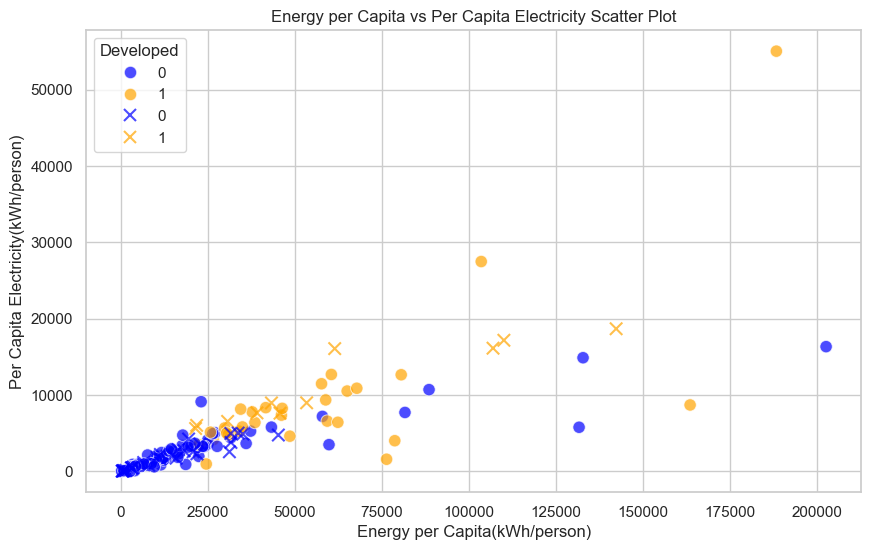

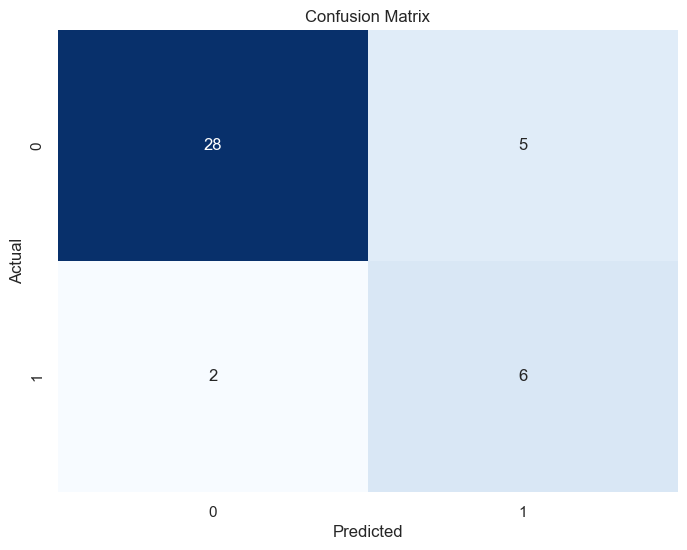

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

selected_data_2018_cleaned_2 = selected_data_2018_cleaned.dropna(subset=['iso_code'])

# 创建包含发达国家ISO代码的列表
developed_countries = [
    "AUS", "AUT", "BEL", "CAN", "CYP", "CZE", "DNK", "EST", "FIN", "FRA",
    "DEU", "GRC", "HKG", "ISL", "IRL", "ISR", "ITA", "JPN", "KOR", "LVA",
    "LTU", "LUX", "MAC", "MLT", "NLD", "NZL", "NOR", "PRT", "PRI", "SMR",
    "SGP", "SVK", "SVN", "ESP", "SWE", "CHE", "TWN", "GBR", "USA"
]

# 添加是否为发达国家的信息为新的一列
selected_data_2018_cleaned_2.loc[:, 'Developed'] = selected_data_2018_cleaned_2['iso_code'].apply(lambda x: 'Yes' if x in developed_countries else 'No')

print(selected_data_2018_cleaned_2)

# 定义特征和目标变量
features = selected_data_2018_cleaned_2[['energy_per_capita', 'per_capita_electricity']]
target = selected_data_2018_cleaned_2['Developed'].map({'Yes': 1, 'No': 0})

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

# 创建支持向量机分类器
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
predictions = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

# 使用 zero_division 参数避免 UndefinedMetricWarning
classification_report_result = classification_report(y_test, predictions, zero_division=1)

# 打印模型性能
print(f"准确度: {accuracy}")
print("分类报告:\n", classification_report_result)

# 画出散点图
plt.figure(figsize=(10, 6))

# 画训练集的散点图
sns.scatterplot(x='energy_per_capita', y='per_capita_electricity', hue='Developed', data=pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1), palette=['blue', 'orange'], marker='o', s=80, alpha=0.7)

# 画预测集的散点图
sns.scatterplot(x='energy_per_capita', y='per_capita_electricity', hue='Developed', data=pd.concat([X_test.reset_index(drop=True), pd.Series(predictions, name='Developed')], axis=1), palette=['blue', 'orange'], marker='x', s=80, linewidth=1.5, alpha=0.7)

plt.title('Energy per Capita vs Per Capita Electricity Scatter Plot')
plt.xlabel('Energy per Capita(kWh/person)')
plt.ylabel('Per Capita Electricity(kWh/person)')

# 显示图例
plt.legend(title='Developed')
plt.show()

# 计算混淆矩阵
confusion_matrix_result = confusion_matrix(y_test, predictions)

# 绘制热图
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### 5.1.2 逻辑回归模型
利用逻辑回归模型，通过支持向量机的RBF核和二次多项式扩展，对2018年的国家数据进行了发达国家的预测。通过散点图展示了训练集和测试集中发达国家和非发达国家的分布情况，并使用混淆矩阵和热图对模型性能进行了评估。最终，通过散点图和等高线图展示了模型在能源和电力消耗数据上的非线性决策边界，辅助理解模型的分类效果。

准确度: 0.9024390243902439
分类报告:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        33
           1       0.75      0.75      0.75         8

    accuracy                           0.90        41
   macro avg       0.84      0.84      0.84        41
weighted avg       0.90      0.90      0.90        41



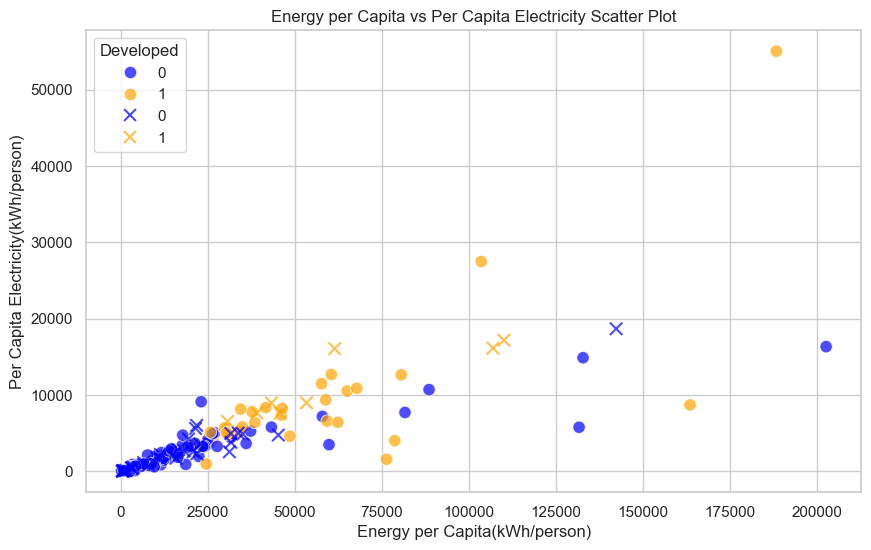

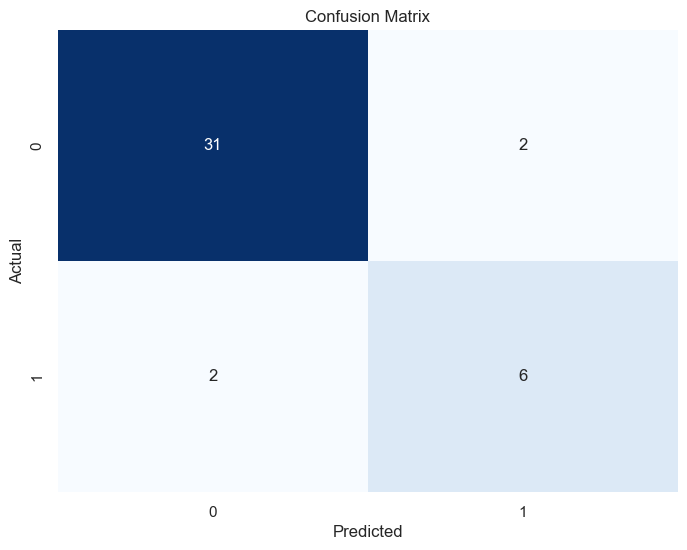

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix

# 定义特征和目标变量
features = selected_data_2018_cleaned_2[['energy_per_capita', 'per_capita_electricity']]
target = selected_data_2018_cleaned_2['Developed'].map({'Yes': 1, 'No': 0})

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

# 创建带有 RBF 核的逻辑回归模型，并使用LogisticRegressionCV选择最佳的正则化参数
clf = make_pipeline(StandardScaler(), LogisticRegressionCV(cv=5, multi_class='multinomial', max_iter=1000))

# 对特征进行二次多项式扩展
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 在训练集上训练模型
clf.fit(X_train_poly, y_train)

# 在测试集上进行预测
predictions = clf.predict(X_test_poly)

# 评估模型性能
accuracy = accuracy_score(y_test, predictions)
classification_report_result = classification_report(y_test, predictions, zero_division=1)

# 打印模型性能
print(f"准确度: {accuracy}")
print("分类报告:\n", classification_report_result)

# 画出散点图
plt.figure(figsize=(10, 6))

# 画训练集的散点图
sns.scatterplot(x='energy_per_capita', y='per_capita_electricity', hue='Developed', data=pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1), palette=['blue', 'orange'], marker='o', s=80, alpha=0.7)

# 画预测集的散点图
sns.scatterplot(x='energy_per_capita', y='per_capita_electricity', hue='Developed', data=pd.concat([X_test.reset_index(drop=True), pd.Series(predictions, name='Developed')], axis=1), palette=['blue', 'orange'], marker='x', s=80, linewidth=1.5, alpha=0.7)

plt.title('Energy per Capita vs Per Capita Electricity Scatter Plot')
plt.xlabel('Energy per Capita(kWh/person)')
plt.ylabel('Per Capita Electricity(kWh/person)')

# 显示图例
plt.legend(title='Developed')
plt.show()

# 计算混淆矩阵
confusion_matrix_result = confusion_matrix(y_test, predictions)

# 绘制热图
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


- 分析:由图可知，预测准确度较高。

## 5.2 人均一次能源消耗量的预测
- 采用中国的数据，删去有缺失字段的记录
- 建立时间序列模型，使用人均总发电量和人均GDP预测未来的能源消耗趋势
- 前面80%的时间数据用于训练，后面20%的时间数据用于验证预测效果。
- 创建SARIMAX（季节性自回归整合滑动平均外生因子）时间序列模型，该模型考虑了 'per_gdp' 和 'per_capita_electricity' 两个外部回归因子，以训练集中的人均能源消耗数据进行训练，通过自动化工具pmdarima选择了适用于中国能源消耗时间序列的 SARIMAX 模型的阶数。训练完成后，利用训练好的模型对验证集的未来能源消耗趋势进行预测，并通过可视化展示了训练集、验证集以及预测结果的趋势。最终的图表通过横坐标表示年份，纵坐标表示人均能源消耗，用以直观展示模型的预测效果。

**SARIMAX 模型中的回归方程可以表示为：**
$ Y_t = \alpha + \beta_1 X_{1,t} + \beta_2 X_{2,t} + \ldots + \beta_k X_{k,t} + \varepsilon_t $

其中：
- $Y_t$ 是时间序列的观测值（这里是人均能源消耗）。
- $\alpha$ 是截距项。
- $X_{1,t}, X_{2,t}, \ldots, X_{k,t}$是外部回归因子（这里是 'per_gdp' 和 'per_capita_electricity'）。
- $\beta_1, \beta_2, \ldots, \beta_k$是对应于外部回归因子的系数。
- $\varepsilon_t$是白噪声误差。

C:\Users\IDO\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\IDO\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\IDO\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\IDO\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


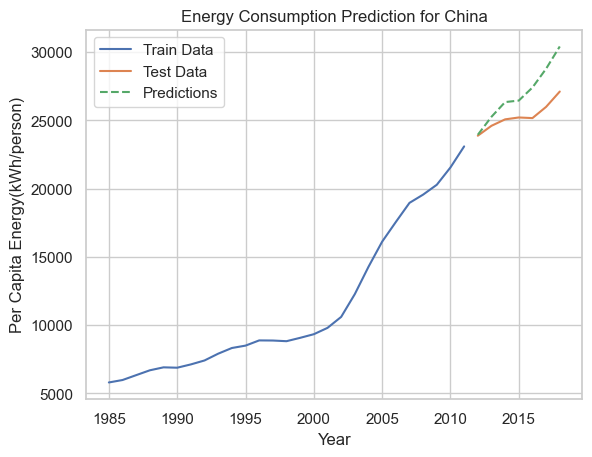

In [23]:
import pandas as pd
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# 选择中国的数据并删除缺失年份的行
df['per_gdp'] = df['gdp'] / df['population']
China_data_selected = df[(df['country'] == 'China')].dropna(subset=['year', 'per_gdp', 'per_capita_electricity', 'energy_per_capita'])

# 按时间升序排序
China_data_selected = China_data_selected.sort_values(by='year')

# 划分训练集和验证集
train_size = int(len(China_data_selected) * 0.8)
train_data, test_data = China_data_selected[:train_size], China_data_selected[train_size:]

# 使用 pmdarima 自动确定 SARIMAX 模型的阶数
auto_model = auto_arima(train_data['energy_per_capita'], exogenous=train_data[['per_gdp', 'per_capita_electricity']], seasonal=True, suppress_warnings=True)

# 获取自动选择的阶数
order = auto_model.get_params()['order']
seasonal_order = auto_model.get_params()['seasonal_order']

# 创建 SARIMAX 模型，使用自动选择的阶数
model = SARIMAX(train_data['energy_per_capita'], exog=train_data[['per_gdp', 'per_capita_electricity']], order=order, seasonal_order=seasonal_order)

# 训练模型
model_fit = model.fit()

# 预测未来能源消耗趋势，使用验证集数据和对应的 'per_gdp' 和 'per_capita_electricity'
exog_test = test_data[['per_gdp', 'per_capita_electricity']]
predictions = model_fit.get_forecast(steps=len(test_data), exog=exog_test)

# 可视化训练集和验证集的能源消耗趋势
plt.plot(train_data['year'], train_data['energy_per_capita'], label='Train Data')
plt.plot(test_data['year'], test_data['energy_per_capita'], label='Test Data')
plt.plot(test_data['year'], predictions.predicted_mean, label='Predictions', linestyle='dashed')
plt.legend()
plt.title('Energy Consumption Prediction for China')
plt.xlabel('Year')
plt.ylabel('Per Capita Energy(kWh/person)')
plt.show()



- 分析：预测结果显示，在验证集上，模型较好地捕捉到了未来人均能源消耗的趋势。通过与实际验证集数据的比较，我们观察到预测结果与实际观测值之间的趋势基本吻合，这表明模型在考虑了 'per_gdp' 和 'per_capita_electricity' 的情况下，较好地适应了时间序列的变化。但预测值明显高于实际值，可能由于新冠疫情等社会因素的影响。


## 5.3 能源结构的预测
- 采用中国的数据，删去有缺失字段的记录
- 建立时间序列模型，预测未来的可再生能源在一次能源消耗中所占份额（renewables_share_energy）
- 前面90%的时间数据用于训练，后面10%的时间数据用于验证预测效果。
### 5.3.2 ARIMA时间序列模型
- 通过ARIMA模型拟合训练集数据，使用pmdarima自动确定ARIMA模型的阶数(p, d, q)。
  - p（AR阶数）：1，代表自回归（Autoregressive）部分的阶数。这表示模型使用前一个时间点（lag）的观测值来预测当前的值。
  - d（差分阶数）：2，代表进行二阶差分。差分是为了使时间序列变得平稳，这通常涉及减去前一个时间点的值。
  - q（MA阶数）：1，代表移动平均（Moving Average）部分的阶数。这表示模型使用前一个时间点的预测误差来修正当前的预测。
- 利用训练好的模型对未来进行占比趋势预测，并通过Matplotlib可视化展示了训练集、验证集以及模型预测结果的变化趋势。


C:\Users\IDO\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\IDO\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\IDO\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\IDO\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\IDO\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base

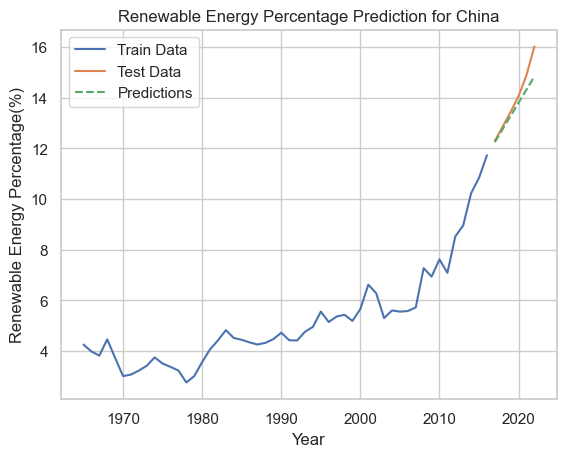

In [24]:
import pandas as pd
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# 选择中国的数据并删除缺失字段的记录
China_data_selected = df[(df['country'] == 'China')].dropna(subset=['year', 'renewables_share_energy'])

# 按时间升序排序
China_data_selected = China_data_selected.sort_values(by='year')

# 划分训练集和验证集
train_size = int(len(China_data_selected) * 0.9)
train_data, test_data = China_data_selected[:train_size], China_data_selected[train_size:]

# 使用 pmdarima 自动确定 ARIMA 模型的阶数
auto_model = auto_arima(train_data['renewables_share_energy'], suppress_warnings=True)

# 获取自动选择的阶数
order = auto_model.get_params()['order']

# 创建 ARIMA 模型，使用自动选择的阶数
model = ARIMA(train_data['renewables_share_energy'], order=order)

# 训练模型
model_fit = model.fit()

# 预测未来可再生能源占比趋势
predictions = model_fit.forecast(steps=len(test_data))

# 可视化训练集和验证集的可再生能源占比趋势
plt.plot(train_data['year'], train_data['renewables_share_energy'], label='Train Data')
plt.plot(test_data['year'], test_data['renewables_share_energy'], label='Test Data')
plt.plot(test_data['year'], predictions, label='Predictions', linestyle='dashed')
plt.legend()
plt.title('Renewable Energy Percentage Prediction for China')
plt.xlabel('Year')
plt.ylabel('Renewable Energy Percentage(%)')
plt.show()


- 分析：预测结果显示，在验证集上，模型较好地捕捉到了未来人均能源结构的趋势，可再生能源占一次能源的比重上升。通过与实际验证集数据的比较，我们观察到预测结果与实际观测值之间的趋势基本吻合。但预测值略低于实际值，可能由于没有周全地考虑经济发展速度的影响。

### 5.3.2 卷积神经网络
- 使用卷积神经网络（CNN）进行时间序列预测的过程。通过生成序列的函数创建训练集和验证集的序列，构建的卷积神经网络包含卷积层和全连接层，使用均方误差作为损失函数进行训练。模型训练完成后，对测试集进行预测，并通过反归一化还原预测结果。最后，使用Matplotlib可视化训练集、测试集以及模型的预测结果，展示对可再生能源占比趋势的预测效果。




Epoch 1/50

2/2 [==============================] - 2s 331ms/step - loss: 0.0567 - val_loss: 0.7245
Epoch 2/50
2/2 [==============================] - 0s 57ms/step - loss: 0.0479 - val_loss: 0.6451
Epoch 3/50
2/2 [==============================] - 0s 53ms/step - loss: 0.0393 - val_loss: 0.5743
Epoch 4/50
2/2 [==============================] - 0s 54ms/step - loss: 0.0326 - val_loss: 0.5082
Epoch 5/50
2/2 [==============================] - 0s 47ms/step - loss: 0.0263 - val_loss: 0.4470
Epoch 6/50
2/2 [==============================] - 0s 48ms/step - loss: 0.0218 - val_loss: 0.3909
Epoch 7/50
2/2 [==============================] - 0s 49ms/step - loss: 0.0181 - val_loss: 0.3403
Epoch 8/50
2/2 [==============================] - 0s 49ms/step - loss: 0.0151 - val_loss: 0.2962
Epoch 9/50
2/2 [==============================] - 0s 57ms/step - loss: 0.0125 - val_loss: 0.2573
Epoch 10/50
2/2 [==============================] - 0s 54ms/step - loss: 0.0111 - val_loss: 0.2226
Epoch 11/50
2/2 [=======

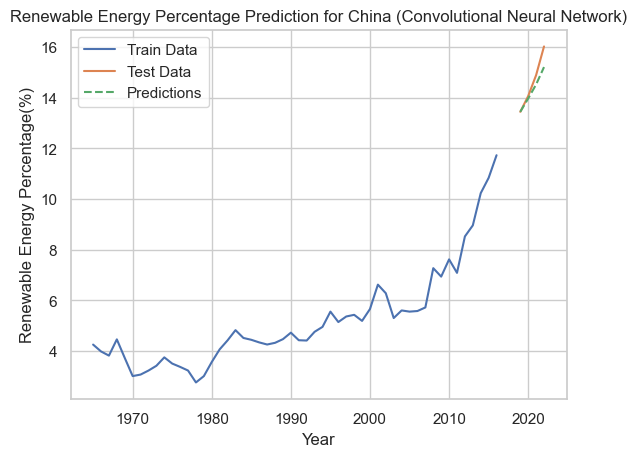

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense

# 选择中国的数据并删除缺失字段的记录
China_data_selected = df[(df['country'] == 'China')].dropna(subset=['year', 'renewables_share_energy'])

# 按时间升序排序
China_data_selected = China_data_selected.sort_values(by='year')

# 使用 'renewables_share_energy' 列作为特征
data = China_data_selected['renewables_share_energy'].values.reshape(-1, 1)

# 归一化数据
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# 划分训练集和验证集
train_size = int(len(data_scaled) * 0.9)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

# 定义生成序列的函数
def generate_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        label = data[i + seq_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# 设置时间序列长度
sequence_length = 2

# 生成训练集和验证集的序列
X_train, y_train = generate_sequences(train_data, sequence_length)
X_test, y_test = generate_sequences(test_data, sequence_length)

# 构建卷积神经网络模型
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(sequence_length, 1)))
model.add(Flatten())
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# 预测未来可再生能源占比趋势
predictions = model.predict(X_test)

# 反归一化预测结果
predictions_inv = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# 可视化训练集和验证集的可再生能源占比趋势
plt.plot(China_data_selected['year'][:len(train_data)], scaler.inverse_transform(train_data), label='Train Data')
plt.plot(China_data_selected['year'][len(train_data) + sequence_length:], y_test_inv, label='Test Data')
plt.plot(China_data_selected['year'][len(train_data) + sequence_length:], predictions_inv, label='Predictions', linestyle='dashed')
plt.legend()
plt.title('Renewable Energy Percentage Prediction for China (Convolutional Neural Network)')
plt.xlabel('Year')
plt.ylabel('Renewable Energy Percentage(%)')
plt.show()

- 分析：预测结果显示，模型很好地捕捉到了未来人均能源结构的趋势，可再生能源占一次能源的比重上升。预测结果与实际观测值基本无明显偏差，分析同上。

# 6 总结
## 经济发展水平与能源电力消耗：
通过对经济发展水平与能源电力消耗的关系进行深入分析，我们发现了一系列重要的观察和趋势。首先，随着国家和地区的经济发展，人均GDP的增加往往伴随着人均一次能源消耗量、人均总发电量的上升而上升。这表明经济繁荣与对能源电力的需求存在正向关系。而关于因果关系的讨论仍需进一步探讨。理解其经济发展和能源需求之间的相互作用有助于制定更加精准的能源政策，促使可再生能源的发展和使用，以应对日益紧迫的气候变化挑战。同时，深入研究能源与经济关系，能够为各国提供制定可持续发展战略和绿色能源转型的指导。

## 未来的能源消耗情况与能源结构趋势：
对未来能源消耗情况的预测与对能源结构趋势的分析成为了本研究的重要部分。通过时间序列模型和机器学习方法，我们试图捕捉未来能源消耗的趋势，并考虑了可再生能源在能源结构中的角色。预测结果显示了一些潜在的趋势，但同时我们也注意到不确定性因素的存在，导致拟合模型预测结果与实际结果存在一定偏差，需要在决策制定中谨慎考虑这些因素。预测未来的能源需求则是为了更好地规划未来的能源供给体系，确保能够满足不断增长的能源需求同时减缓对环境的不利影响，有助于政府、企业、社会组织做出明智的决策，还能够引导国家在能源方面的发展方向，推动全球能源格局朝着更加可持续、清洁的方向发展。